## Regularized Linear Models

- The prediction error can be decomposed into two components: bias and variance
    - bia를 조금 혀용해도 var를 왕찰줄일 수 있으면 그렇게 한다.
- Regularized linear models aim to minimize prediction error be reducing variance
- 
- RIdge, LASSO 모두 linear regression기반이고 독립변수들을 통해 Y를 설명하려고 하는 것이다
이떄 MSE를 최소화하는 beta들을 찾는 것이 우리가 원하는 작업이다.
- regularized linear model의 목적 : 모형의 복잡도(beta개수)가 증가하면 over fitting 감소하면 underfitting 경향이 있고 우리는 이 모형들을 통해 overfitting 모형의 복잡도를 컨트롤 해서 over fitting을 해소 하는 데에 그 목적이 있다.
- 
-  
그렇다면 어떻게 복잡도를 컨트롤 할까? 아래 리지모형을 보자

### Ridge Regression

- $y_i = \beta_0 + \beta_1 x_i + \beta_2 z_i + \beta_3 w_i + \epsilon_i$
- Loss function = OLS loss function (Mean-squared error) $\sum e^2_i$ + $\alpha \sum_{k} \beta_k^2$
- $\alpha \sum_{k} \beta_k^2$란? 
    - L2 penalty, or L2 regularization (계수값을 다 제곱해서 더해준 것)
    - $\alpha$, a hyperparameter, needs to be chosen.(페널티텀의 가중치(영향력) 역할을 함)
    - $\alpha = 0$ can lead to overfitting(평범한 linear regression), while a very large value of $\alpha$ can lead to underfitting.
        - 계수 값을 다 제곱을 했기 때문에 페널티텀은 양수이고 우리는 이것을 가장 작게만드는 것을 
          찾기 때문에 0이면 overfit, 0에서 멀어지면 under fit
        - 독립변수 X텀들이 마구 늘어나면 overfit되는데 그럼 결국 페널티텀에 더해지는 베타수가 많아져서 
           로스펑션이 커진다(참고 : 모형의 복잡도는 독립변수의 개수, 즉 베타 개수이다)
    - It draws all coefficient estimates closer to zero but does not impose exact zeros anywhere $\rightarrow$ it is a *shrinkage* method that helps prevent coefficients from becoming unduly large in magnitude.
      (계수값을 0은 아니지만 그에 가깝제 줄여주는 방식이다 : Shrinkage method)
    - 페널티텀 때문에 리지모형은 bias가 생기긴하지만 variance를 더 왕창 낮출 수 있다
    
- Regularization applies only to the training set.
- Regularization does not apply to the intercept term. 
- Ridge regression is very sensitive to feature scales $\rightarrow$ very important to scale(변수 값의 단위가 굉장히 중요하다)
    - 만약 변수의 단위가 m를 cm로만 바꾸어도 값의 변화는 없지만 계수가 줄어든다. 또한 키의 단위와 시력의 단위를 비교하면 당연히 키의 단위가 커서 beta도 높게 나올 것이다.

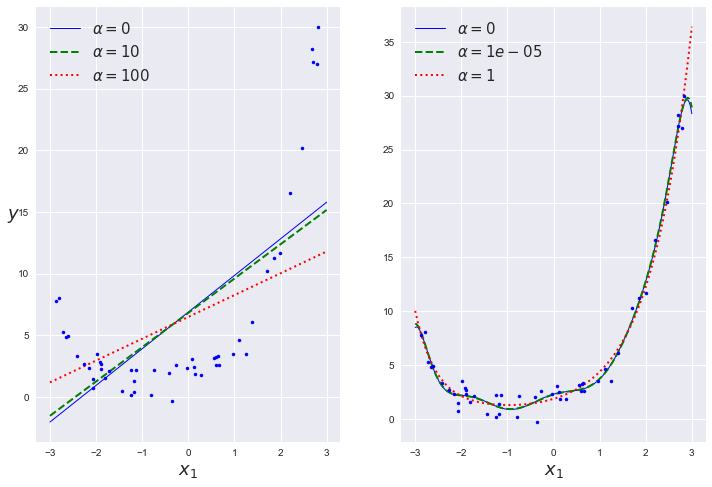

In [1]:
from sklearn.linear_model import Ridge

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
m = 50
X = 6 * np.random.rand(m, 1) - 3
y =  0.2 * X**4 + 0.4 * X**3 + 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
   # plt.axis([0, 3, 0, 4])

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

- left figure: ridge model with varing $\alpha$
    - $\alpha$가 커지면 기울기(beta)값들이 작아진다.
- right figure: PolynomialFeatures (degree = 10차항), StandardScaler, ridge model with varying $\alpha$
- the larger $\alpha$, the flatter
    - $\alpha$가 낮을때는 흐물흐물하면서 잘맞게 올라가지만 $\alpha$가 증가하면서 점점더 선이 빳빳해지고
        flat해진 곡선이 된다. 즉 보면 알파를 너무크게 주면 오히려 underfitting이 일어난다.
    - 오른쪽 그림 파란선은 bias는 적지만 variance가 있는 형태, 빨간선은 bias가 많은 형태(탄착군이 이상한 곳에 형성)
    - 원래 모형이 over fitting문제가 있었다면  $\alpha$를 증가시켜 조금 under fitting시키면 된다
- One can use either normal equations or GD(경사하강법) for ridge regression.

In [2]:
# based on normal equations
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) #cholesky는 normal equaition
#GD방식의 경우 solver에 "sag"넣어서 함, 근데 initial value가 auto여서 안넣어도 됨
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[11.30027687]])

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1917.14it/s]


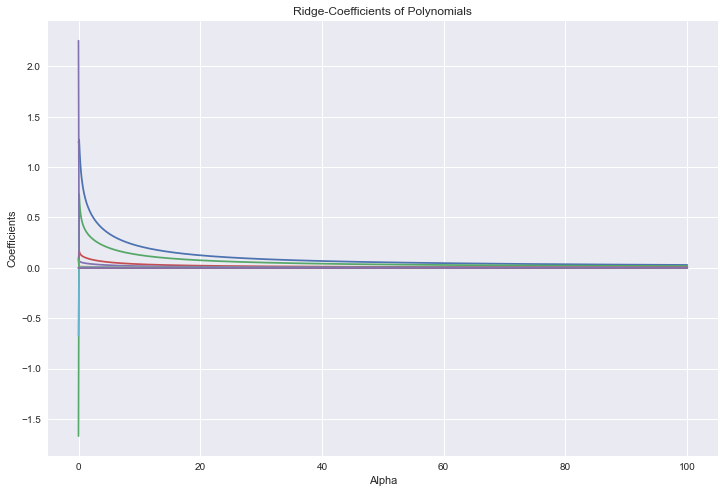

In [3]:
#  alpha가 증가함에 따라 계수 값들이 0에 가까워짐(0은 안됨)
# 마치 계량의 R^2을 생각해보면 됨 adj Rd은 R을 regularized한것
from tqdm import tqdm

poly = PolynomialFeatures(degree=10, include_bias=False)
X1 = poly.fit_transform(X)
alphas = np.linspace(0,100,1000)
coefs = []

for alpha in tqdm(alphas):
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X1, y)
    coefs.append(ridge.coef_)

    
plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot(alphas,np.array([coefs[x][0][i] for x in range(len(coefs))]))
plt.title('Ridge-Coefficients of Polynomials')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()

### LASSO

- Loss function = OLS loss function + $\alpha \sum_{k} | \beta_k |$
    - L1 regularization
        - 위의 RIdge모형에서 beta제곱이 절댓값으로 바뀐것 밖에 없다
        - L1텀 뒤에 (1- $\alpha$)L2텀 넣으면 Ridge LAsso 합친 모형이다
    - It can be used for feature selection:
        - shrinks the coefficients of less important features to zero $\rightarrow$ can be used to select important features of the data $\rightarrow$ can be thought of as a variable *selection* method
        - 리지와 다르게 라소는 베타값들이 정확이 0이 되게할 수도 있다. 물론 라소도 줄어들게 하지만 0ㅇ로 만들
        어 버리기도해서 변수를 선정하는 역할을 해서 selection method라고 불린다

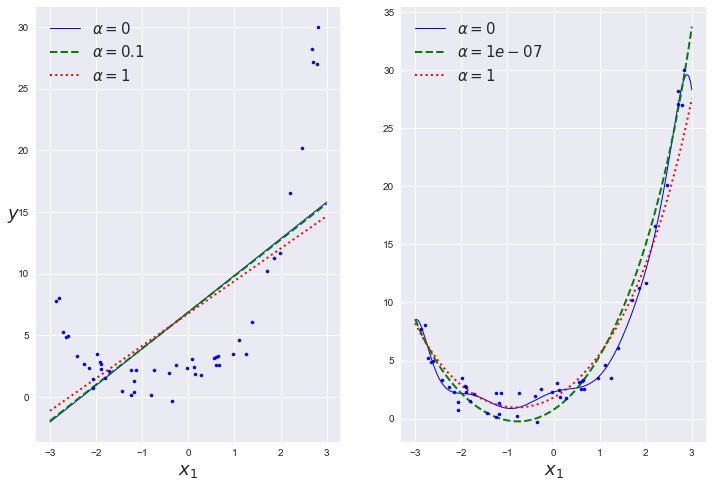

In [4]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(12,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()
#위와 마찬가지로 알파가 커지면 계수값이 작아지고, 복잡한 overfit된 모형이 underfit되는 경향이 있다.(더 적합하게 함).
# 즉 적절한 알파를 선택하는 것이 중요함
# 그럼 그 알파를 어떻게 찾냐? 하나씩 다해본다음 테스트를 해서 가장 모형을 잘 예측하는 알파를 선택한다.

- 위와 마찬가지로 알파가 커지면 계수값이 작아지고, 복잡한 overfit된 모형이 underfit되는 경향이 있다.(더 적합하게 함).
- 즉 적절한 알파를 선택하는 것이 중요함
- 그럼 그 알파를 어떻게 찾냐? 하나씩 다해본다음 테스트를 해서 가장 모형을 잘 예측하는 알파를 선택한다.

In [5]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([11.27485542])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]C:\Users\chris\AppData\Local\Temp/ipykernel_19144/3345827516.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X1, y)
C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1870.51it/s]


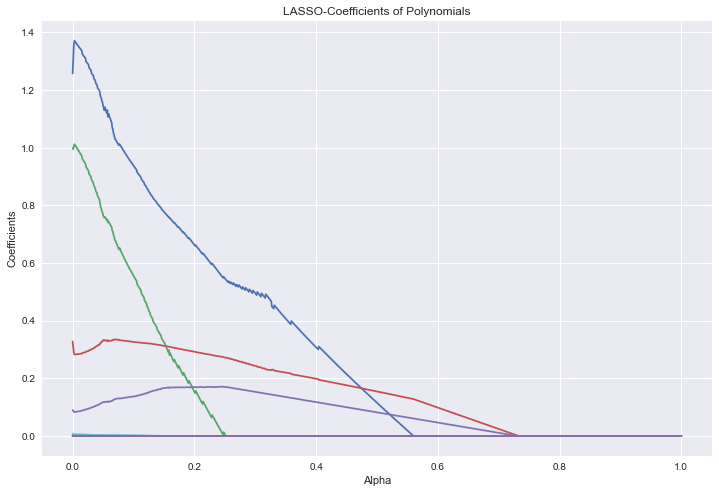

In [6]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X1 = poly.fit_transform(X)
alphas = np.linspace(0,1,1000)
coefs = []

for alpha in tqdm(alphas):
    lasso = Lasso(alpha=alpha, tol=0.01, normalize=True)
    lasso.fit(X1, y)
    coefs.append(lasso.coef_)

    
plt.figure(figsize=(12,8))
for i in range(10):
    plt.plot(alphas, np.array([coefs[x][i] for x in range(len(coefs))]))
plt.title('LASSO-Coefficients of Polynomials')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.show()
#아래 그림은 알파값이 커짐에따라 계수값이 작아지는 것을 보여줌
# 알파가 0일때는 서로 계수값의 차이가 천차만별이지만 나중에는 0으로 다 모임

- 동심원이 바깥에 있을 수록 error는 커짐
- 마름모는 LASSO모형(절댓값), 원은 RIDGE모형(베타 제곱)
- 라소모형쪽은 꼭지점(한 베타가 0인지점)에서 만나고(해당 변수를 drop), 리지모형은 0인지정에서 만나진 않지만 0과 가까운 지점에서 만난다

<img src="./img/ridge_lasso.png" width="600" height="600">

## Early Stopping
- another way of regularizing the iterative algorithm such as GD is to stop when one arrives at the mimium of loss function. 
    - 너무 많이 가면(베타가 너무 감소) 모형이 적합해지지 않을 수 있어서 적합한 지점에(at the mimium of loss function.) 도착하면 stop하는 것이다
    - 모형이 완전히 학습되기전에 오버피팅을 방지하고자 학습을 이르게 종료하는 방법이다
- https://en.wikipedia.org/wiki/Early_stopping

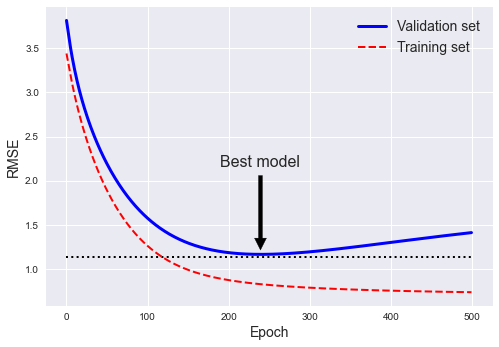

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()